In [1]:
# Standard stuff
import numpy as np                              #For almost everything
import matplotlib.pyplot as plt                 #For plotting
from matplotlib.colors import ListedColormap
import matplotlib.gridspec as gridspec
from matplotlib.backends.backend_pdf import PdfPages       #For saving figures to single pdf
from plotting import plotTF, plotTFs
figlist = []

#*******************************************************************************************************
#Setting RC Parameters for figure size and fontsizes
import matplotlib.pylab as pylab                           
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (20, 10),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
pylab.rcParams.update(params)

In [2]:
def stitch(filelist):
    leastF = 5e4
    prevul = -1
    stichedData = np.zeros((0,3))
    header = []
    while(len(filelist)>0):
        if len(filelist)==1:
            LFfile = filelist[0]
        else:
            for fn in filelist:
                ll = np.loadtxt(fn)[0,0]
                if ll<leastF:
                    leastF = ll
                    LFfile = fn
        temp = np.loadtxt(LFfile)
        filelist.remove(LFfile)
        with open(LFfile) as f:
            for line in f.readlines():
                if line[0] is '#':
                    header += [line]
        tempff = temp[:,0]
        for ii in range(len(tempff)):
            if tempff[ii]>prevul:
                break
        stichedData = np.concatenate((stichedData,temp[ii:,:]))
        prevul = tempff[-1]
        leastF = 5e4
        
    return stichedData, header

In [3]:
fList = ['NPMC_FP1_to_MixerOut_CLTF_LF_07-01-2020_172134.txt',
         'NPMC_FP1_to_MixerOut_CLTF_MF_07-01-2020_171418.txt',
         'NPMC_FP1_to_MixerOut_CLTF_HF_07-01-2020_172024.txt']
data, header = stitch(fList)
ff = data[:,0]
CLTF = (10**(data[:,1]/20))*np.exp(1j*data[:,2]*np.pi/180)

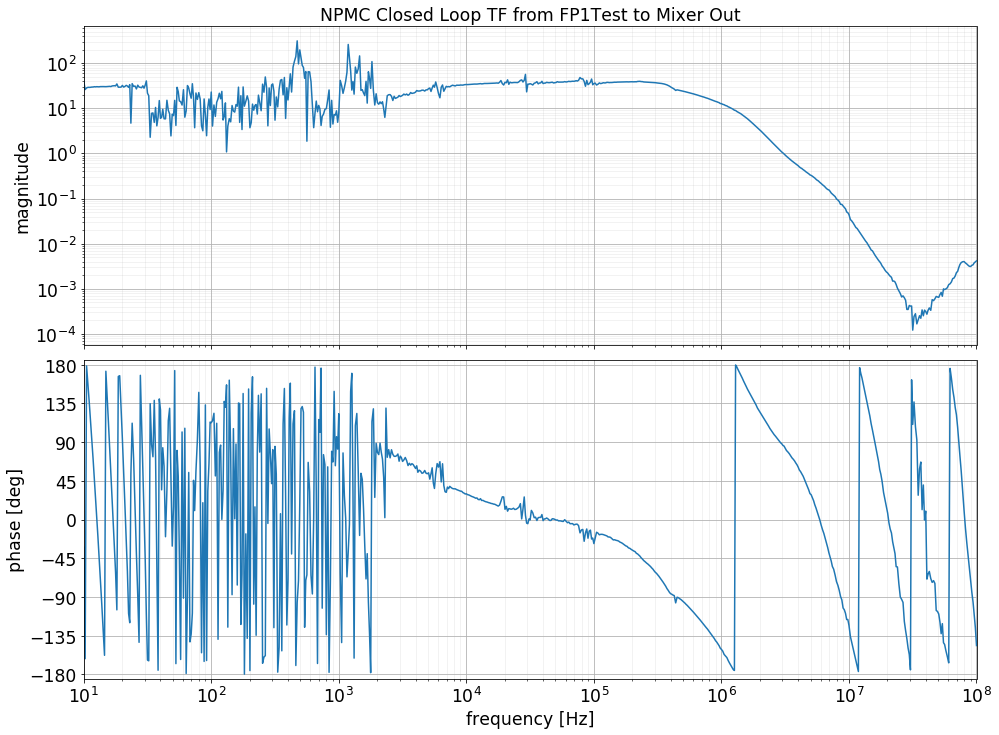

In [4]:
fig = plotTF(ff, CLTF, figsize=[16,12])
ax = fig.axes[0]
ax.set_title('NPMC Closed Loop TF from FP1Test to Mixer Out')
figlist += [fig]

In [5]:
fList = ['NPMC_FP1_to_MixerOut_OLTF_LF_08-01-2020_123139.txt',
         'NPMC_FP1_to_MixerOut_OLTF_MF_08-01-2020_122834.txt',
         'NPMC_FP1_to_MixerOut_OLTF_HF_08-01-2020_123032.txt']
data, header = stitch(fList)
ff = data[:,0]
TF = (10**(data[:,1]/20))*np.exp(1j*data[:,2]*np.pi/180)

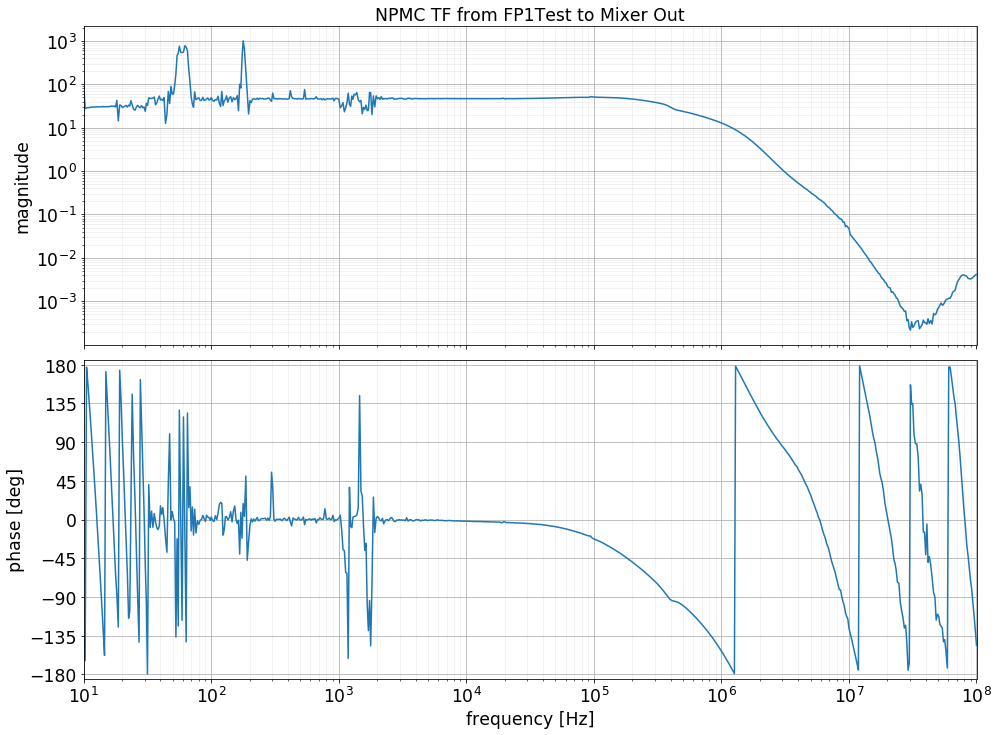

In [6]:
fig = plotTF(ff, TF, figsize=[16,12])
ax = fig.axes[0]
ax.set_title('NPMC TF from FP1Test to Mixer Out')
figlist += [fig]

In [7]:
Rswt = 20
C = 330e-12
XC = 1/(1j*2*np.pi*ff*C)
L = 39e-6
XL = 1j*2*np.pi*ff*L
R = 49.9

LPF = R/(Rswt + (1/XC + 1/(R+XL))**-1)
G = (9.09e3/100 + 1)

b_by_a = 1 - CLTF/TF
a_by_b = 1/b_by_a
OLTF = 1/(a_by_b - 1)

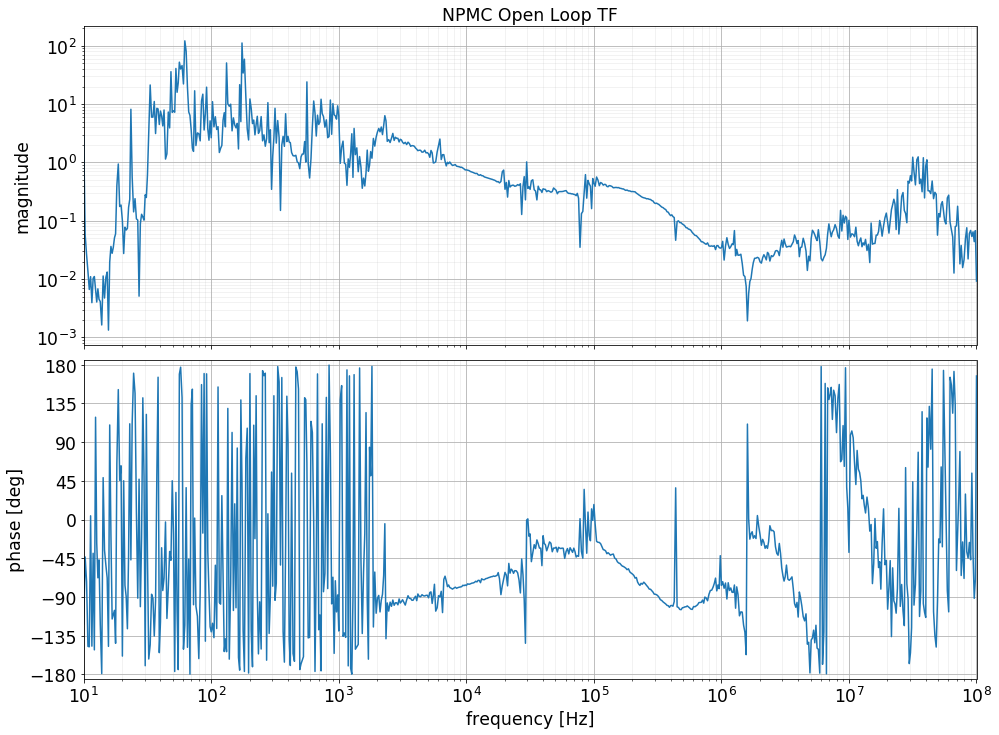

In [8]:
fig = plotTF(ff, OLTF, figsize=[16,12])
ax = fig.axes[0]
ax.set_title('NPMC Open Loop TF')
figlist += [fig]

In [9]:
pp = PdfPages('NPMC_TF.pdf')
for fig in figlist:
    pp.savefig(fig,bbox_inches='tight')
pp.close()